# Python project Exploring the Evolution of Lego

You are a Data Analyst at Lego working with the Sales/Customer Success teams. The Account Executive responsible for the Star Wars partnership has asked for specific information in preparation for their meeting with the Star Wars team. Although Star Wars was critical to the survival of the brand, Lego has since introduced a wide variety of licensed sets over subsequent years.

Your two questions are as follows:

* What percentage of all licensed sets ever released were Star Wars themed? Save your answer as a variable `the_force` in the form of an integer (e.g. 25).

* In which year was Star Wars not the most popular licensed theme in terms of number of sets released that year? Save your answer as a variable 'new_era' in the form of an integer (e.g. 2012).

<p>Before diving into our analysis though, let's become familiar with the two datasets that will help you with this project:<br><br></p>
<div style="background-color: #ebf4f7; color: #595959; text-align:left; vertical-align: middle; padding: 15px 25px 15px 25px; line-height: 1.6;">
    <div style="font-size:20px"><b>datasets/lego_sets.csv</b></div>
<ul>
    <li><b>set_num:</b> A code that is unique to each set in the dataset. <b><i>This column is critical, and a missing value indicates the set is a duplicate or invalid!</i></b></li>
    <li><b>set_name:</b> A name for every set in the dataset (note that this can be the same for different sets).</li>
    <li><b>year:</b> The date the set was released.</li>
    <li><b>num_parts:</b> The number of parts contained in the set.<b><i> This column is not central to our analyses, so missing values are acceptable.</i></b></li>
        <li><b>theme_name:</b> The name of the sub-theme of the set.</li>
    <li><b>parent_theme:</b> The name of the parent theme the set belongs to. Matches the `name` column of the `parent_themes` csv file.</li>
</ul>

<div style="font-size:20px"><b>datasets/parent_themes.csv</b></div>
<ul>
    <li><b>id:</b> A code that is unique to every theme.</li>
    <li><b>name:</b> The name of the parent theme.</li>
    <li><b>is_licensed:</b> A Boolean column specifying whether the theme is a licensed theme.</li>
</ul>
    </div>
<p>From here on out, it will be your task to explore and manipulate the existing data until you are able to answer the two questions described in the instructions panel. </p>
<p><em><strong>

## Reading Data

In [140]:
import pandas as pd

df = pd. read_csv('datasets/lego_sets.csv')
df. head ()

,set_num,name,year,num_parts,theme_name,parent_theme
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland
1,0011-2,Town Mini-Figures,1978,NaN,Supplemental,Town
2,0011-3,Castle 2 for 1 Bonus Offer,1987,NaN,Lion Knights,Castle
3,0012-1,Space Mini-Figures,1979,12.0,Supplemental,Space
4,0013-1,Space Mini-Figures,1979,12.0,Supplemental,Space


In [141]:
theme = pd. read_csv('datasets/parent_themes.csv')

In [30]:
theme. head (20)

,id,name,is_licensed
0,1,Technic,False
1,22,Creator,False
2,50,Town,False
3,112,Racers,False
4,126,Space,False
5,147,Pirates,False
6,155,Modular Buildings,False
7,158,Star Wars,True
8,186,Castle,False
9,204,Designer Sets,False


## Queston 1. What percentage of all licensed sets ever released were Star Wars themed? 

It would be helpful if we join the two datasets together.

In [142]:
merged = df.merge(theme, left_on = 'parent_theme', right_on = 'name')
merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,name_y,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,Legoland,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,Legoland,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,Legoland,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,Legoland,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,Legoland,False


In [143]:
merged.drop(columns='name_y', inplace=True)
merged.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


In [144]:
licensed = merged[merged['is_licensed']]
licensed.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


In [145]:
star_wars = licensed[licensed['parent_theme'] == 'Star Wars']
star_wars.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
3493,10018-1,Darth Maul,2001,1868.0,Star Wars,Star Wars,158,True
3494,10019-1,Rebel Blockade Runner - UCS,2001,NaN,Star Wars Episode 4/5/6,Star Wars,158,True
3495,10026-1,Naboo Starfighter - UCS,2002,NaN,Star Wars Episode 1,Star Wars,158,True
3496,10030-1,Imperial Star Destroyer - UCS,2002,3115.0,Star Wars Episode 4/5/6,Star Wars,158,True
3497,10123-1,Cloud City,2003,707.0,Star Wars Episode 4/5/6,Star Wars,158,True


Sine the `set_num`contains null value, and a missing value indicates the set is a duplicate or invalid, I will look into this column before our calculation.

In [58]:
merged[merged['set_num'].isnull()].shape

(153, 8)

In [78]:
licensed = licensed.dropna(subset=['set_num'])

In [62]:
the_force = int(star_wars.shape[0]/licensed.shape[0]*100)
the_force

51

So, 51% of all licensed sets ever released were Star Wars themed.

## Question 2. In which year was Star Wars not the most popular licensed theme in terms of number of sets released that year? 

Since the `is_licensed` column contains boolean value, I will use this column to do the following calculation.

In [146]:
summed_df = licensed.groupby(['year', 'parent_theme']).sum().reset_index()
summed_df.head()

,year,parent_theme,num_parts,id,is_licensed
0,1999,Star Wars,1384.0,2054,13
1,2000,Disney's Mickey Mouse,405.0,1940,5
2,2000,Star Wars,2580.0,4108,26
3,2001,Harry Potter,1582.0,3444,14
4,2001,Star Wars,2949.0,2212,14


In [147]:
max_df = summed_df.sort_values ('is_licensed', ascending=False) .drop_duplicates (['year' ])

In [88]:
max_df.sort_values ('year', inplace=True) 
max_df

,year,parent_theme,num_parts,id,is_licensed
0,1999,Star Wars,1384.0,2054,13
2,2000,Star Wars,2580.0,4108,26
4,2001,Star Wars,2949.0,2212,14
6,2002,Star Wars,4735.0,4424,28
9,2003,Star Wars,6660.0,5056,32
12,2004,Star Wars,1659.0,3160,20
16,2005,Star Wars,4730.0,4424,28
20,2006,Star Wars,2769.0,1738,11
24,2007,Star Wars,11361.0,2528,16
28,2008,Star Wars,6865.0,3634,23


In [ ]:
new_era = 2017

Now we know that Star Wars was not the most popular licensed theme in 2017.

## Bonus Question: How many unique sets were released each year (1955-2017)?

In [148]:
clean_df = merged[~merged['set_num'].isnull()]
clean_df.head()

,set_num,name_x,year,num_parts,theme_name,parent_theme,id,is_licensed
0,00-1,Weetabix Castle,1970,471.0,Castle,Legoland,411,False
1,00-2,Weetabix Promotional House 1,1976,NaN,Building,Legoland,411,False
2,00-3,Weetabix Promotional House 2,1976,NaN,Building,Legoland,411,False
3,00-4,Weetabix Promotional Windmill,1976,126.0,Building,Legoland,411,False
4,00-7,Weetabix Promotional Lego Village,1976,NaN,Building,Legoland,411,False


In [155]:
clean_df['count'] = 1
sets_per_year = clean_df.groupby(['year']).sum()
sets_per_year

/var/folders/8j/r707nck94_3180l7yt3qzdb80000gn/T/ipykernel_3531/1229692699.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['count'] = 1


,num_parts,id,is_licensed,count,1
year,,,,,
1950,26.0,2555,0,7,7
1953,1.0,1460,0,4,4
1954,122.0,5110,0,14,14
1955,813.0,10352,0,28,28
1956,107.0,4512,0,12,12
...,...,...,...,...,...
2013,55435.0,208091,86,593,593
2014,68273.0,286217,99,715,715
2015,81808.0,272892,107,670,670


In [98]:
for index, row in sets_per_year.iterrows():
    print (row['year'],row['count' ])

1 1
1950 7
1953 4
1954 14
1955 28
1956 12
1957 21
1958 42
1959 4
1960 3
1961 17
1962 40
1963 18
1964 11
1965 10
1966 89
1967 21
1968 25
1969 69
1970 29
1971 45
1972 38
1973 68
1974 39
1975 31
1976 67
1977 92
1978 73
1979 82
1980 88
1981 79
1982 76
1983 57
1984 76
1985 139
1986 123
1987 209
1988 68
1989 114
1990 85
1991 106
1992 115
1993 111
1994 128
1995 128
1996 144
1997 194
1998 325
1999 300
2000 327
2001 339
2002 447
2003 415
2004 371
2005 330
2006 283
2007 319
2008 349
2009 403
2010 444
2011 502
2012 615
2013 593
2014 715
2015 670
2016 608
2017 438


In [151]:
import matplotlib.pyplot as plt

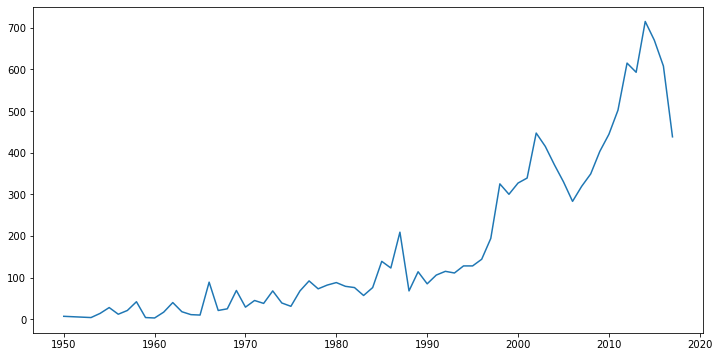

In [152]:
plt.figure(figsize=(12, 6))
plt.plot(sets_per_year['count'])